# Datascience

Vous êtes datascientist chez [**Kickstarter**](https://www.kickstarter.com/), une plate-forme de _crowdfunding_. Vous souhaitez prédire la réussite ou non d'un projet . Avant de créer votre classifieur, vous entreprenez de faire une analyse préparatoire des données (EDA) pour avoir une meilleure intuition sur ces dernières.

Vous avez accès à toutes les ressources que vous souhaitez (cheatsheet, internet, etc.). N'hésitez pas à en faire _bon usage_.

Pensez à bien organiser votre notebook, à annoter vos graphiques et à les commenter judicieusement. Parmis les critères de notation :
- savoir charger un dataset,
- analyse des valeurs manquantes et dupliquées,
- analyse des outliers,
- analyse univariée,
- analyse multivariée,
- ainsi que toute analyse qui vous semble judicieuse pour prédire le succès d’un projet Kickstarter.

## Rendu

Vous rendrez votre Jupyter Notebook via [**Github**](https://github.com/). Pour cela créez un nouveau dépôt (repository) nommé `EDA2018` et uploadez le notebook **seul** sur ce dépôt. Ensuite, envoyez le lien dans un mail aux adresses suivantes :

- `alain.demenet@gmail.com`
- `florent.pietot@gmail.com`

Ajoutez en **pièce jointe** votre **notebook zippé** (afin d'avoir une double sauvegarde de votre travail et pour éviter tout problème éventuel).

## Description du dataset

Le dataset `dataset.csv` est un instantané du site en janvier 2018 :

Colonne | Description
------- | -------
**ID** | internal kickstarter id
**name** | name of project - a project is a finite work with a clear goal that you’d like to bring to life. Think albums, books, or films
**category** | category
**main_category** | category of campaign
**currency** | currency used to support
**deadline** | deadline for crowdfunding
**goal** | fundraising goal - the funding goal is the amount of money that a creator needs to complete their project
**launched** | date launched
**pledged** | pledged amount in the project currency
**state** | current condition the project is in
**backers** | number of backers
**country** | country pledged from
**usd pledged** | amount of money pledged in USD (conversion made by Kickstarter)
**usd_pledged_real** | amount of money pledged in USD (conversion made by fixer.io api)
**usd_goal_real** | goal amount in USD (conversion made by fixer.io api)

**Bon courage !**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
#Cette ligne de code permet d'enlever tout les warnings 

## Affichage du dataframe

In [3]:
df = pd.read_csv('dataset.csv', index_col = 0)
df

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00


## Analyse des valeurs dupliquées

In [13]:
df.duplicated().value_counts()

False    378661
dtype: int64

Comme on peut le voir, il n'y a pas de duplicat dans le dataframe. Par contre s'il y en aurait, il faudrait effectuer un drop du cas en question.

## Analyse des valeurs nulles

In [14]:
df.isnull().sum()

name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
succes                 0
dtype: int64

## Analyse des types de valeurs

In [15]:
df.dtypes

name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
succes                int64
dtype: object

## Describe : description statistique

In [6]:
df.describe()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


## Analyse de toutes les colonnes du dataframe

In [7]:
df.columns

Index(['name', 'category', 'main_category', 'currency', 'deadline', 'goal',
       'launched', 'pledged', 'state', 'backers', 'country', 'usd pledged',
       'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [8]:
df.info

<bound method DataFrame.info of                                                          name  \
ID                                                              
1000002330                    The Songs of Adelaide & Abullah   
1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
1000004038                                     Where is Hank?   
1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
1000011046  Community Film Project: The Art of Neighborhoo...   
1000014025                               Monarch Espresso Bar   
1000023410  Support Solar Roasted Coffee & Green Energy!  ...   
1000030581  Chaser Strips. Our Strips make Shots their B*tch!   
1000034518  SPIN - Premium Retractable In-Ear Headphones w...   
100004195   STUDIO IN THE SKY - A Documentary Feature Film...   
100004721                                 Of Jesus and Madmen   
100005484                                    Lisa Lim New CD!   
1000055792                                 The Cottage Mar

## Etude de corrélation du dataframe

Text(0.5,1,'Corrélation des valeurs numériques du DF')

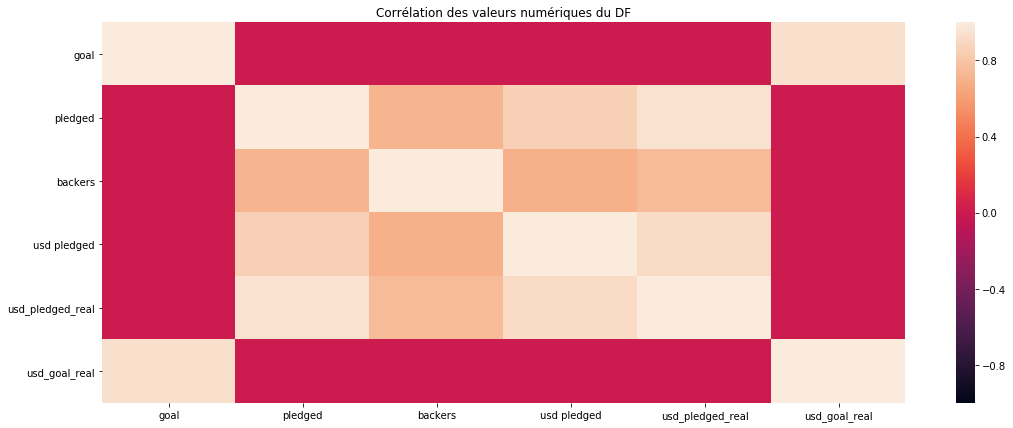

In [9]:
plt.subplots(figsize=(18,7))
sns.heatmap(df.corr(),vmin=-1,vmax=1)
plt.title("Corrélation des valeurs numériques du DF")

## Analyse des outlayers

Text(0.5,1,'Analyse des outlayers')

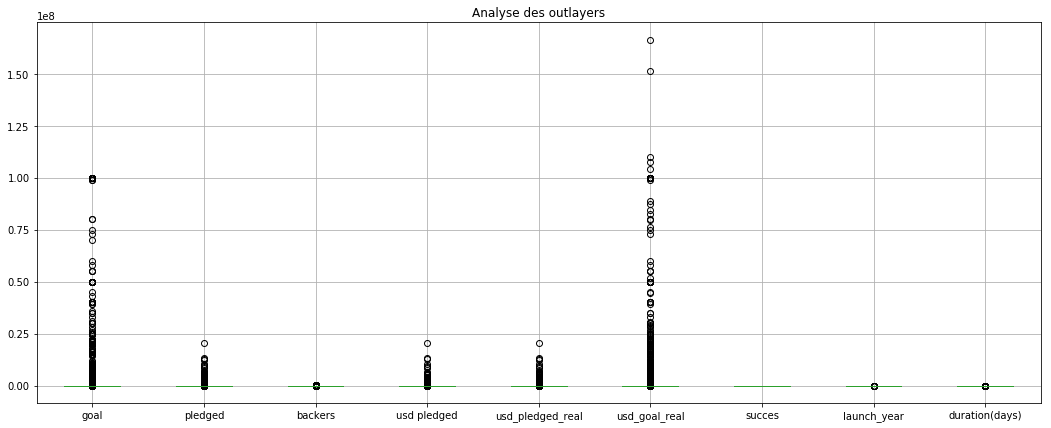

In [116]:
plt.subplots(figsize=(18,7))
df.boxplot()
plt.title("Analyse des outlayers")

## Vérification des conditions du projet

In [11]:
df.state.value_counts() #Regarder les valeurs de réussite, d'échecs ou autre du projet

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

Text(0.5,1,'Répartition des valeurs des states')

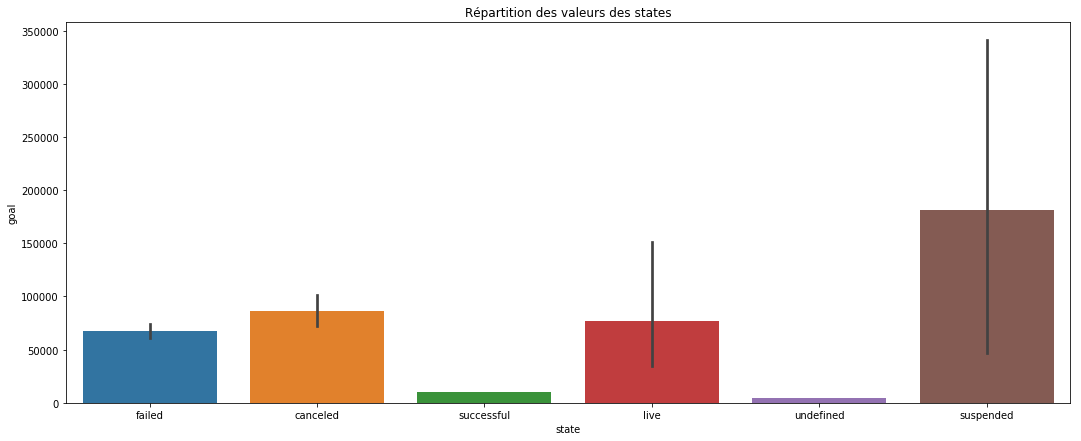

In [113]:
plt.subplots(figsize=(18,7))
sns.barplot(x='state',y='goal',data=df)
plt.title("Répartition des valeurs des states")

Text(0.5,1,'Répartition des valeurs des states')

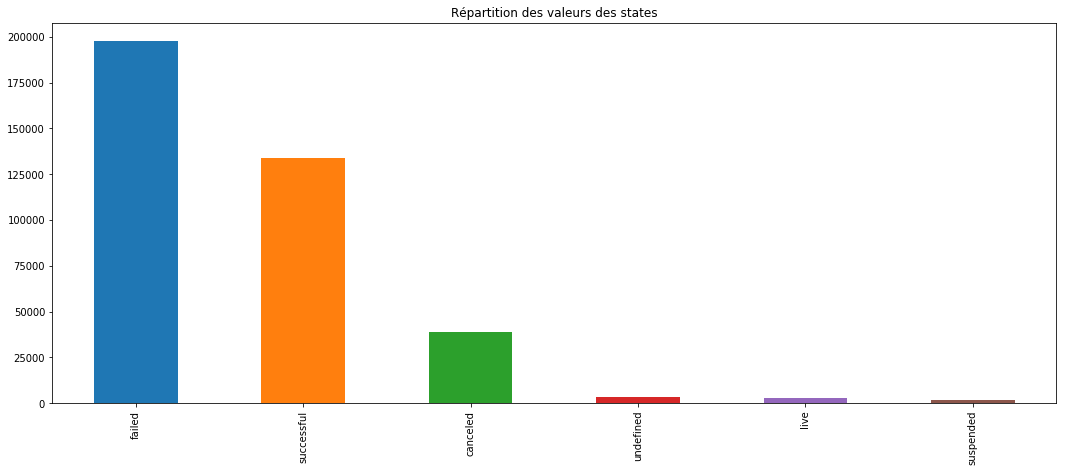

In [112]:
plt.subplots(figsize=(18,7))
df.state.value_counts().plot.bar()
plt.title("Répartition des valeurs des states")


On remarque que pour undefined, live et suspended il n'y a pas énormément de valeur.

Text(0.5,1,'Répartition des valeurs des states qui ont pour valeur successful')

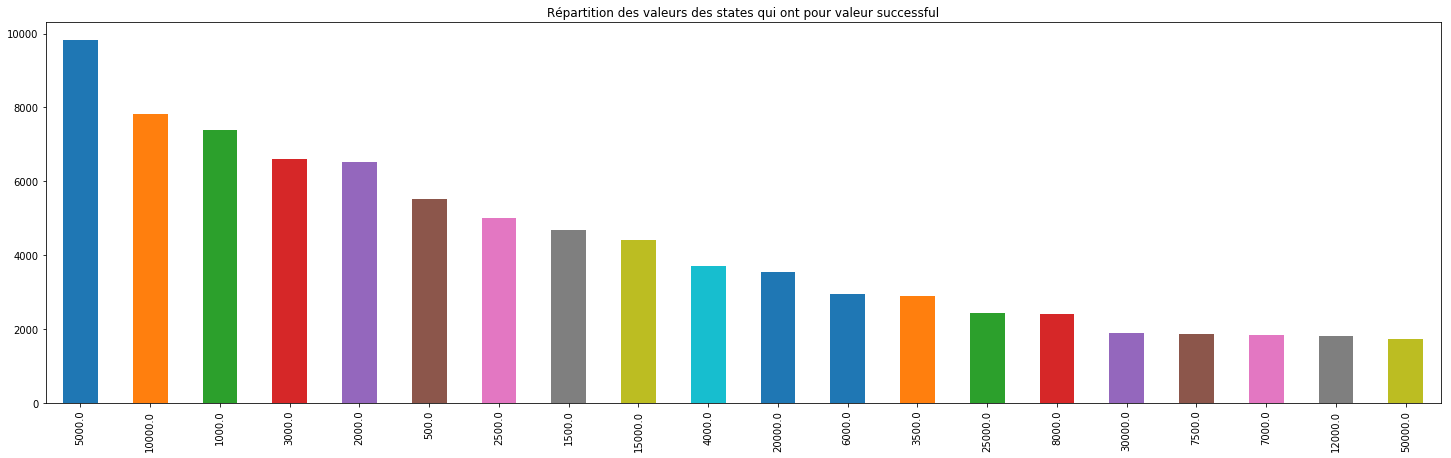

In [119]:
plt.subplots(figsize=(25,7))
df.goal[df['state']=='successful'].value_counts().head(20).plot.bar()
plt.title("Répartition des valeurs des states qui ont pour valeur successful")

Text(0.5,1,'Répartition des valeurs des states qui ont pour valeur failed, canceled state et successful')

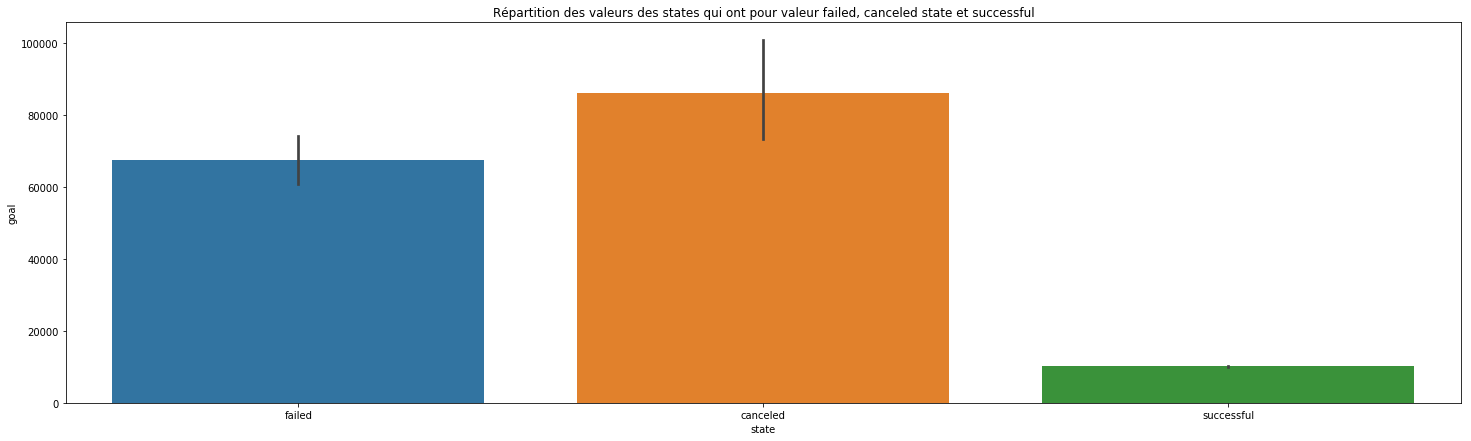

In [120]:
plt.subplots(figsize=(25,7))
sns.barplot(x='state',y='goal',data=df[(df.state == 'failed') | (df.state == 'successful') | (df.state == 'canceled') ])
plt.title("Répartition des valeurs des states qui ont pour valeur failed, canceled state et successful")

J'ai enlevé "undefined", "live" et "suspended" car il n'y a pas assez de valeur comme on peut le voir un peu plus haut sur le plot.bar().
Les résultats pourraient être faussés.

Text(0.5,1,'')

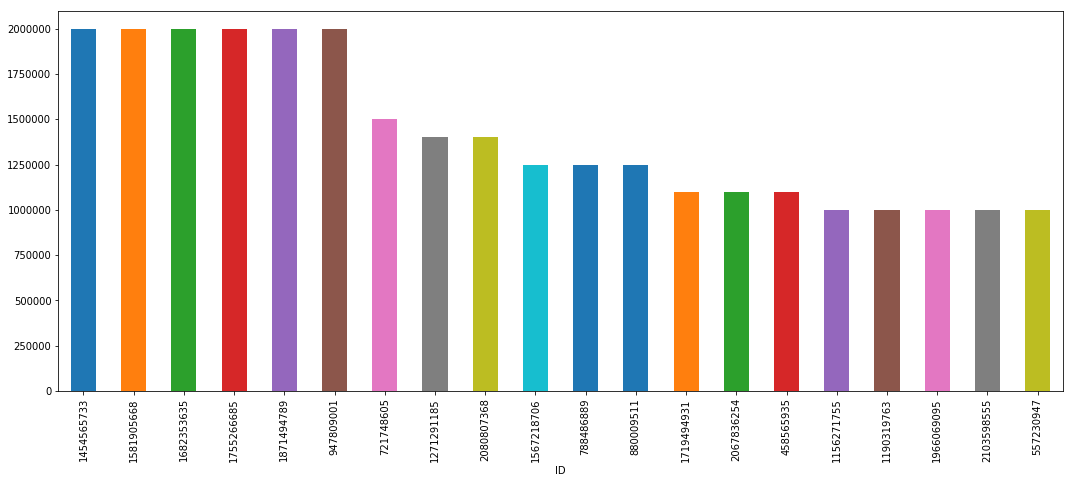

In [111]:
plt.subplots(figsize=(18,7))
df.goal[df['state']=='successful'].nlargest(20).plot.bar()
plt.title("")

Text(0.5,1,'Répartition des catégories en fonction des goals ')

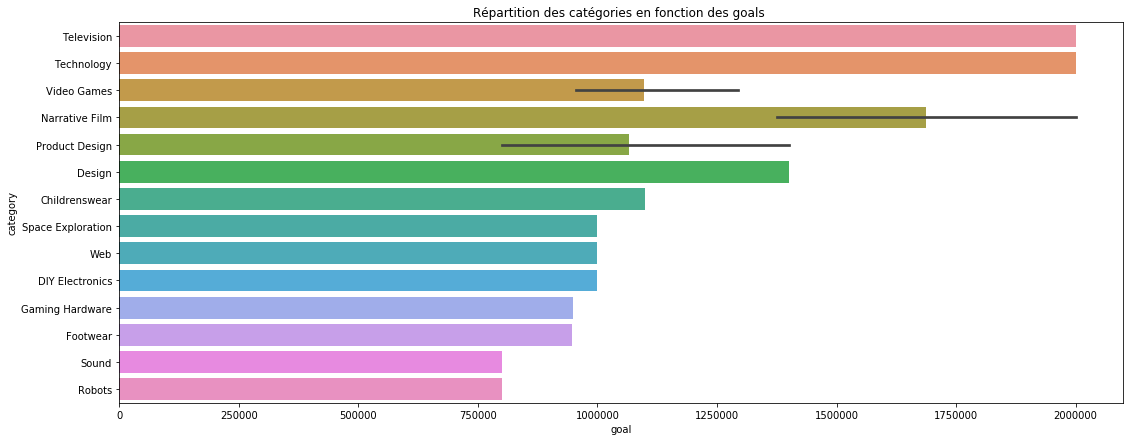

In [18]:
plt.subplots(figsize=(18,7))
sns.barplot(x='goal',y='category',data=df[df['state']== 'successful'].nlargest(35, 'goal'))
plt.title("Répartition des catégories en fonction des goals ")

Les catégories "Television" et "Technology" sont en tête de classement.

## Ajout de la colonne "succes"

In [4]:
df.insert(column = 'succes', value = 0,loc =14) #Je rajoute une column succes à la 14ème place

In [5]:
df.succes[df.state == 'successful']= 1 

Si dans la table state est égale à successful on attribut la valeur 1 pour pouvoir compter plus facilement après lors de l'affichage dans un plot pie.

In [6]:
df.succes.value_counts()

0    244705
1    133956
Name: succes, dtype: int64

Il y a 244 705 échecs et 133 956 succès.

Text(0.5,1,'Répartition des succès')

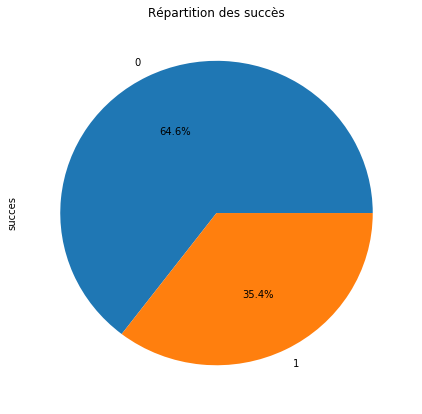

In [23]:
plt.subplots(figsize=(7,7))
df.succes.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Répartition des succès')

Il y a 64,6% de réussite.

## Répartition de la proportion de succès par catégorie

Text(0.5,1,'Répartition de la proportion de succès par catégorie')

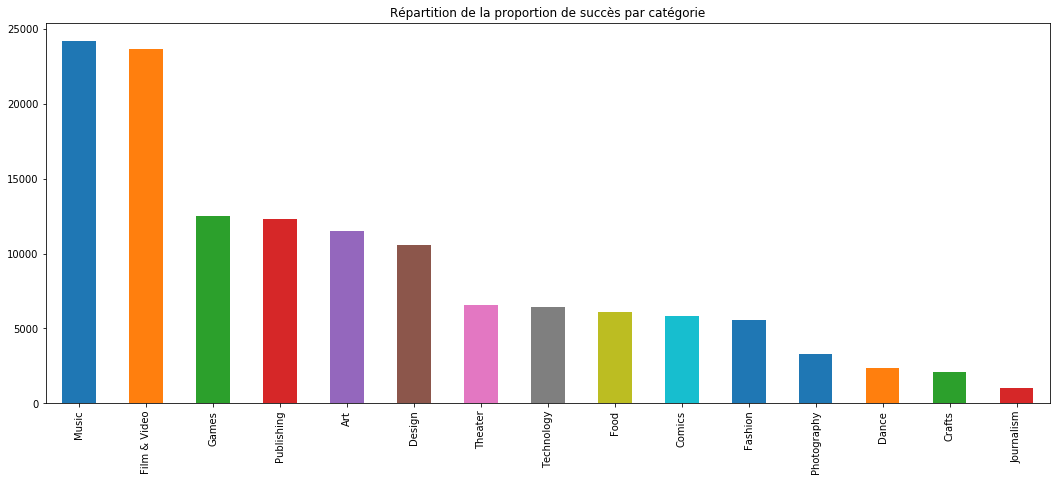

In [25]:
plt.subplots(figsize=(18,7))
df[df.succes == 1].main_category.value_counts().plot.bar()
plt.title('Répartition de la proportion de succès par catégorie')

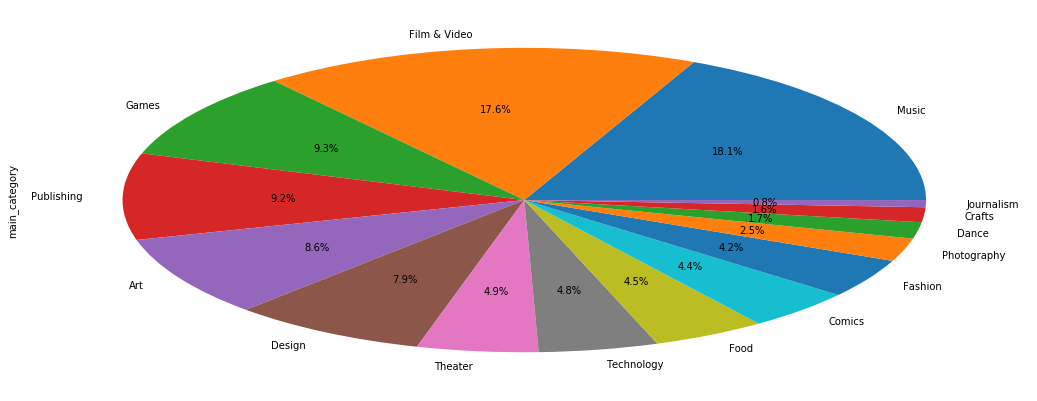

In [108]:
plt.subplots(figsize=(18,7))
df[df.succes == 1].main_category.value_counts().plot.pie(autopct='%1.1f%%')

In [27]:
df[df.succes == 1].main_category.value_counts()

Music           24197
Film & Video    23623
Games           12518
Publishing      12300
Art             11510
Design          10550
Theater          6534
Technology       6434
Food             6085
Comics           5842
Fashion          5593
Photography      3305
Dance            2338
Crafts           2115
Journalism       1012
Name: main_category, dtype: int64

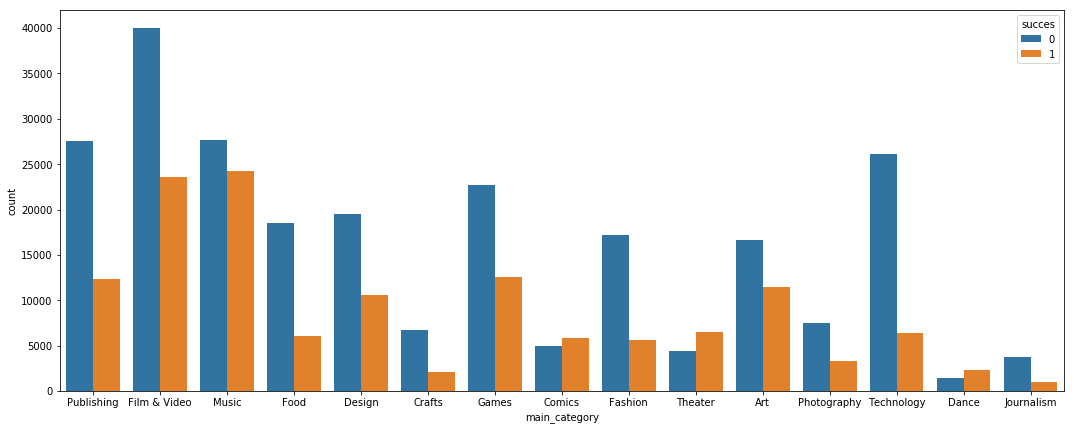

In [46]:
plt.subplots(figsize=(18,7))
sns.countplot(x="main_category", hue="succes", data=df)

Dans cette analyse, il faut observer quelle catégorie possède au minimum plus de 50% de réussite; c'est à dire qu'il faut regarder lorsque la barre de succès est pllus grande que celle des échecs. 
Or, on voit très bien que le choix se porte sur du théâtre, comics ou de la dance.

Text(0.5,1,'Pourcentage de réussite par catégorie')

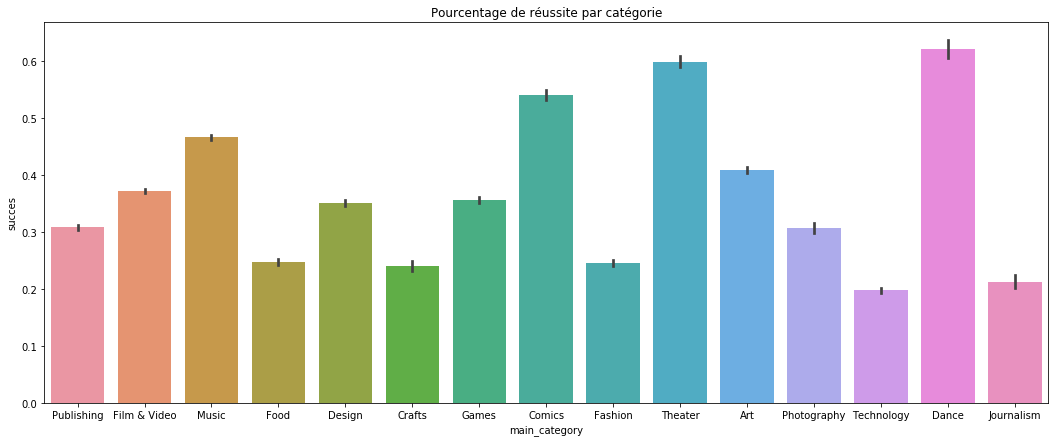

In [29]:
plt.subplots(figsize=(18,7))
sns.barplot(c)

plt.title('Pourcentage de réussite par catégorie')

Grâce à ce barplot, il est possible de justifier le choix des catégories précédemment choisies et qu'il faut deonc privilégier la dance, ensuite le théâtre et enfin le comic.

## Réussite par pays

Text(0.5,1,'Répartition de réussite par pays')

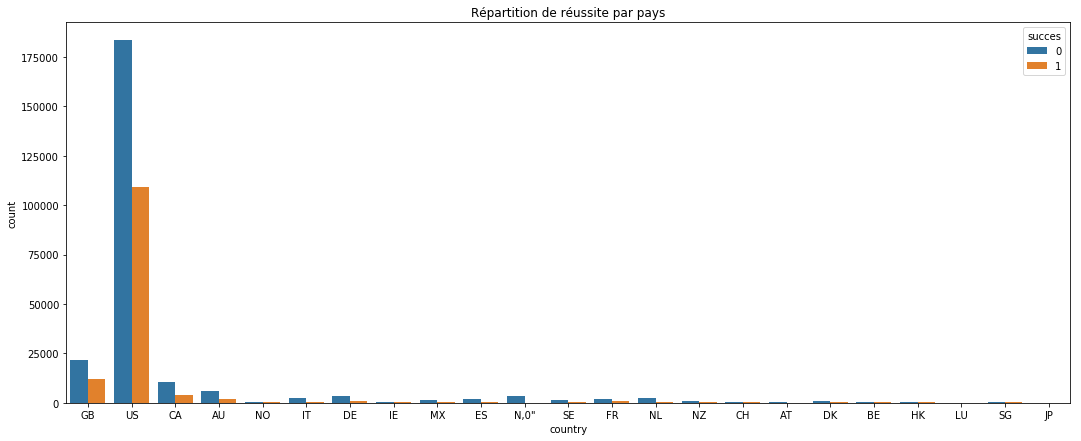

In [30]:
plt.subplots(figsize=(18,7))
sns.countplot(x="country", hue="succes", data=df)
plt.title('Répartition de réussite par pays')

In [31]:
#df[df.country == 'US'].value_counts().head(50).plot.bar()
df[df.succes == 1].country.value_counts()

US      109299
GB       12067
CA        4134
AU        2010
DE         937
FR         908
NL         617
SE         509
ES         492
NZ         448
IT         439
MX         396
DK         360
HK         216
IE         207
CH         187
SG         178
NO         162
BE         152
AT         107
N,0"       105
LU          19
JP           7
Name: country, dtype: int64

On peut remarquer que les Etat-Unis ont une répartition de réussite la plus élevé parmi les autres avec comme valeur 109 299 succès. 

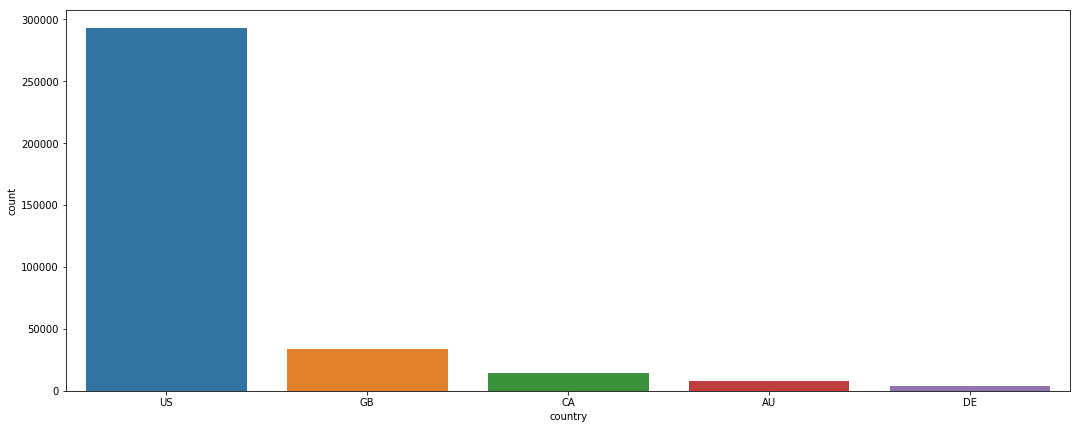

In [107]:
plt.subplots(figsize=(18,7))
sns.countplot('country', data=df, order=df['country'].value_counts().iloc[:5].index)

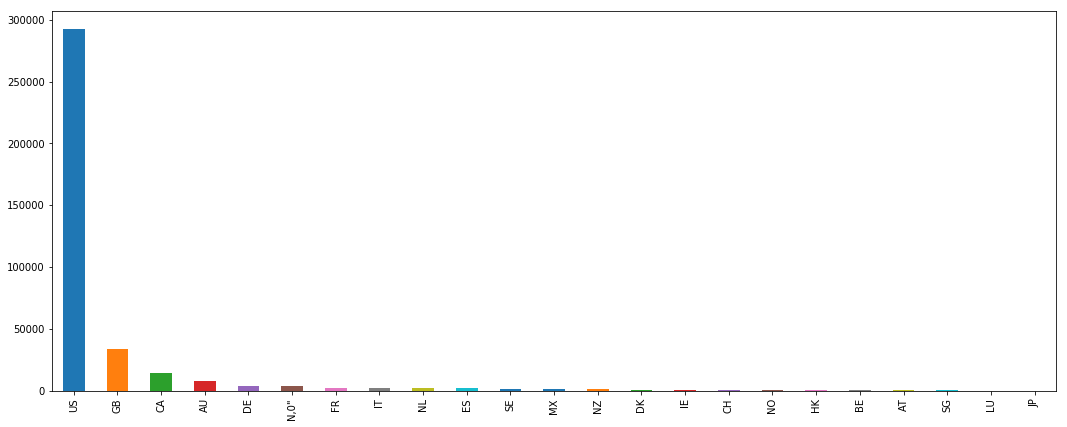

In [106]:
plt.subplots(figsize=(18,7))
df.country.value_counts().plot.bar()

## Projet par catégorie

Text(0.5,1,'Nombre de projet par catégorie')

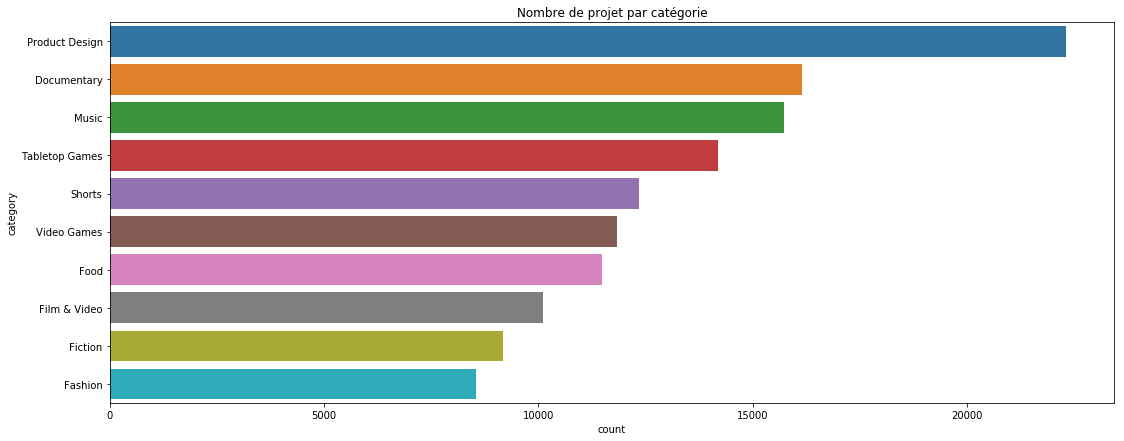

In [105]:
plt.subplots(figsize=(18,7))
sns.countplot(y='category', data=df, order=df['category'].value_counts().iloc[:10].index)
plt.title('Nombre de projet par catégorie')

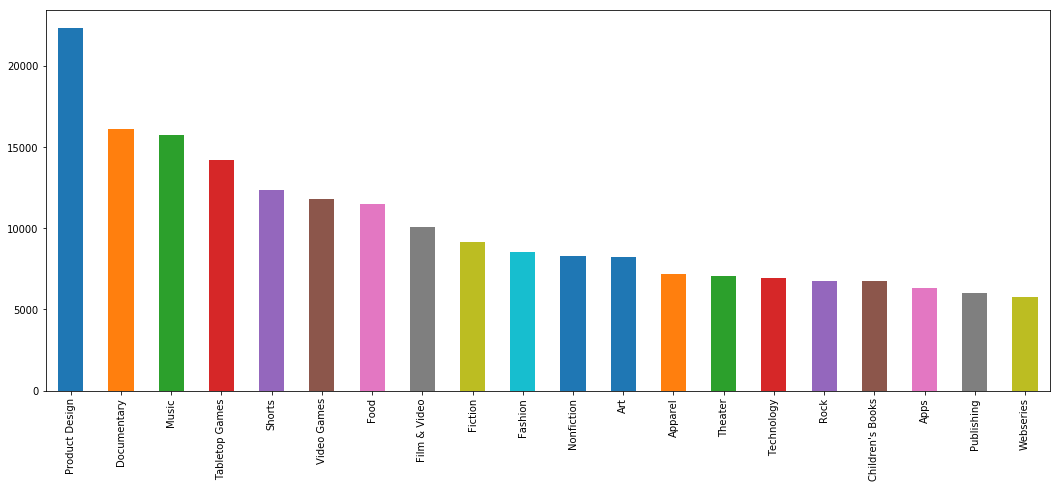

In [102]:
plt.subplots(figsize=(18,7))
df.category.value_counts().head(20).plot.bar()

## Backers en fonction des catégories

Text(0.5,1,'Nombre de backers en fonction de la catégorie')

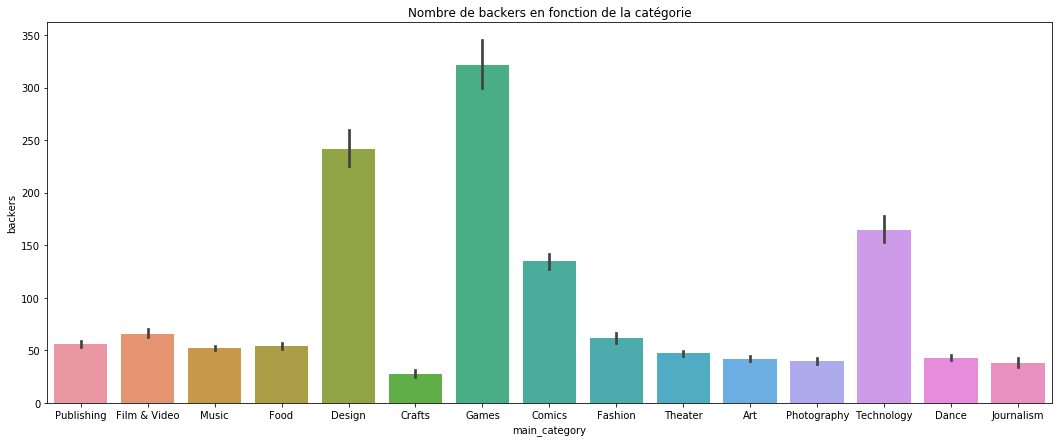

In [139]:
plt.subplots(figsize=(18,7))
sns.barplot(x = 'main_category', y = 'backers',data=df)
plt.title('Nombre de backers en fonction de la catégorie')

## Backers en fonction du succès

Text(0.5,1,'Nombre de bakers en fonction du succès')

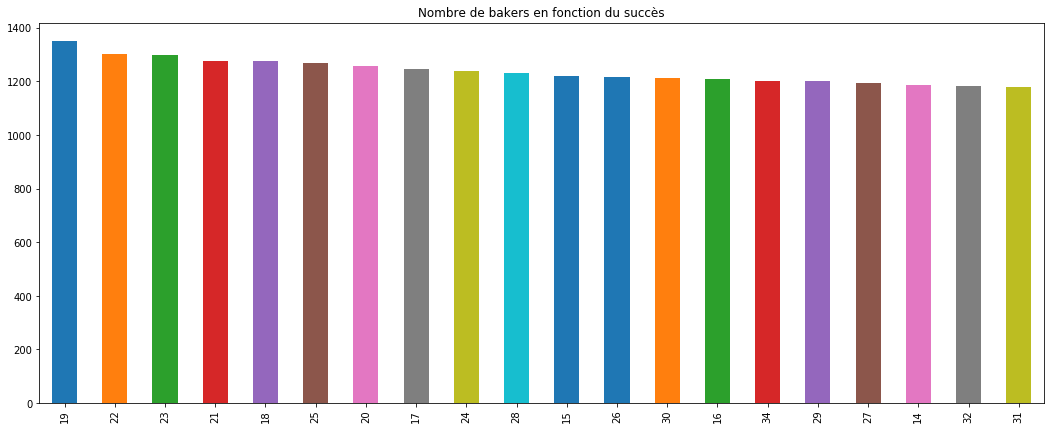

In [69]:
plt.subplots(figsize=(18,7))
df[df.succes == 1].backers.value_counts().head(20).plot.bar()
#sns.barplot(x = 'succes', y = 'backers',data=df)
plt.title('Nombre de bakers en fonction du succès')

In [37]:
df.backers.value_counts()

0        55609
1        34869
2        23196
3        16063
4        12068
5         9716
6         8137
7         7014
8         6198
9         5553
10        5068
11        4547
12        4348
13        4136
14        3950
15        3734
16        3447
17        3440
18        3164
19        3148
20        2959
21        2822
22        2731
23        2648
25        2543
24        2521
26        2416
27        2315
28        2261
29        2159
         ...  
4482         1
2433         1
4226         1
1919         1
3713         1
28274        1
15736        1
2942         1
4477         1
18550        1
1918         1
5250         1
44949        1
2181         1
6784         1
10119        1
1923         1
1411         1
9095         1
2946         1
2690         1
2178         1
4739         1
1922         1
1410         1
2691         1
3712         1
3456         1
74405        1
2047         1
Name: backers, Length: 3963, dtype: int64

In [38]:
df['backers'].unique()

array([   0,   15,    3, ..., 5828, 7855, 2314])

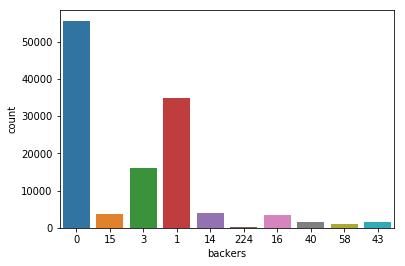

In [131]:
sns.countplot('backers', data=df, order=df['backers'].head(10))

## Rapport entre les backers et les USD Pledged

Text(0.5,1,' Rapport entre les backers et les USD PLEDGED')

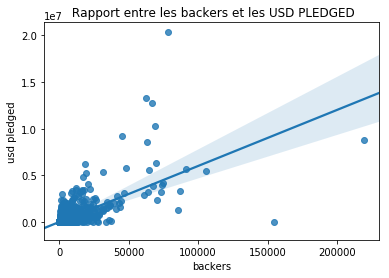

In [127]:
sns.regplot(x='backers',y='usd pledged', data=successful)
plt.title(' Rapport entre les backers et les USD PLEDGED')

## Analyse de projet pendant l'année

In [12]:
df['launch_year']=pd.to_datetime(df['launched'], format="%Y/%m/%d").dt.year

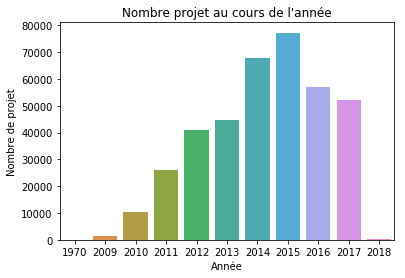

In [14]:
fig = sns.countplot(df.launch_year)
plt.xlabel("Année")
plt.ylabel("Nombre de projet")
plt.title("Nombre projet au cours de l'année")
plt.show(fig)

On remarque qu'au cours de l'année 2015, il y a eu beaucoup plus de projets parmi les autres années.

## Analyse des pledges

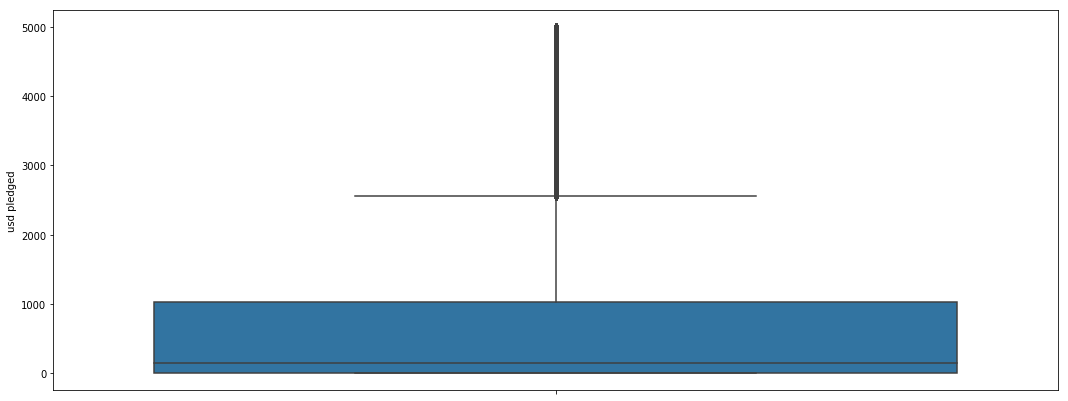

In [132]:
plt.subplots(figsize=(18,7))
#sns.boxplot(y=df['usd pledged'])
sns.boxplot(y=df['usd pledged'][df['usd pledged'] < 5000])

In [41]:
df.columns

Index(['name', 'category', 'main_category', 'currency', 'deadline', 'goal',
       'launched', 'pledged', 'state', 'backers', 'country', 'usd pledged',
       'usd_pledged_real', 'usd_goal_real', 'succes'],
      dtype='object')

<Figure size 1440x1440 with 0 Axes>

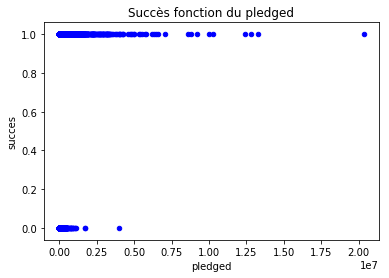

In [123]:
df.plot.scatter(title='Succès fonction du pledged',x='pledged',y='succes',c='blue')

## Analyse des dates / deadlines

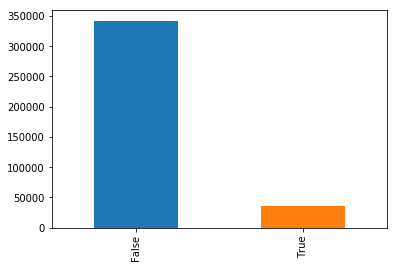

In [46]:
df.launched.str.contains("-07-").value_counts().plot.bar() #pour le mois de juillet

Text(0.5,1," Nb projet launch dans la période de l'année 2013")

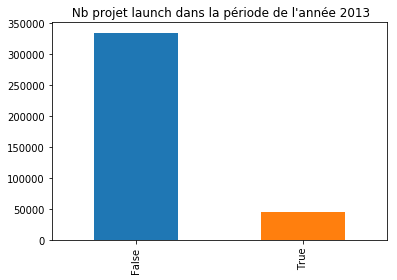

In [22]:
df.launched.str.contains("2013-").value_counts().plot.bar()
plt.title(' Nb projet launch dans la période de l\'année 2013')

In [48]:
df.deadline.str.contains("2013").value_counts()

False    334483
True      44178
Name: deadline, dtype: int64

Text(0.5,1," Nb projet launch dans la période de l'année 2014")

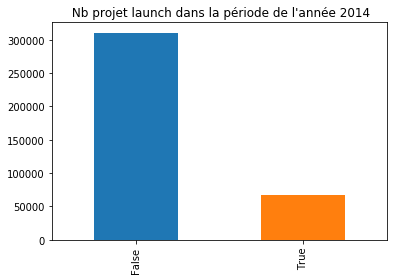

In [21]:
df.launched.str.contains("2014").value_counts().plot.bar()
plt.title(' Nb projet launch dans la période de l\'année 2014')

In [50]:
df.deadline.str.contains("2014").value_counts()

False    312430
True      66231
Name: deadline, dtype: int64

Text(0.5,1," Nb projet launch dans la période de l'année 2015")

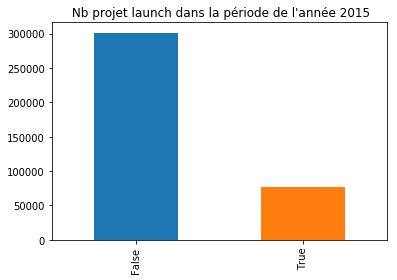

In [18]:
df.launched.str.contains("2015").value_counts().plot.bar()
plt.title(' Nb projet launch dans la période de l\'année 2015')

In [20]:
df.deadline.str.contains("2015").value_counts()

False    301163
True      77498
Name: deadline, dtype: int64

Grâce à cette analyse on remarque qu'il y a énormément de deadline en 2015.

In [ ]:
#df["deadline"] = df["deadline"].str.replace("-","").str.replace(":","")
#df['deadline'] = pd.to_numeric(df['deadline']).plot.bar()

In [11]:
df[df.launched.str.contains('-01-') & df.succes == 1].launched.value_counts()

2015-01-21 14:42:22    2
2014-01-22 21:40:58    2
2013-01-24 18:04:18    2
2013-01-04 06:24:35    2
2017-01-29 00:08:04    2
2015-01-21 04:03:53    2
2011-01-14 21:32:43    1
2016-01-29 14:58:55    1
2016-01-22 19:05:51    1
2011-01-20 23:19:00    1
2016-01-07 19:00:19    1
2015-01-30 16:59:15    1
2015-01-29 20:55:43    1
2016-01-06 22:18:01    1
2012-01-27 21:21:22    1
2013-01-11 18:40:58    1
2017-01-19 05:17:37    1
2014-01-16 07:49:17    1
2015-01-28 08:14:54    1
2017-01-01 20:30:18    1
2012-01-25 22:25:40    1
2014-01-24 00:02:47    1
2012-01-12 13:45:12    1
2013-01-06 19:33:29    1
2012-01-18 17:52:48    1
2013-01-03 14:05:00    1
2011-01-01 04:59:50    1
2011-01-28 01:52:34    1
2012-01-29 18:39:35    1
2014-01-30 10:12:20    1
                      ..
2017-01-06 16:44:41    1
2013-01-30 05:12:31    1
2012-01-12 20:12:27    1
2011-01-04 22:47:04    1
2013-01-24 22:01:02    1
2017-01-25 03:18:37    1
2014-01-13 21:42:45    1
2015-01-21 02:56:12    1
2012-01-31 12:55:37    1


## Ajout de la colonne launch_month

In [ ]:
#df.insert(column = 'launch_month', value = 0,loc =15) #Je rajoute une column succes à la 15ème place
#df.launched[df.launched == 'xMOIS']= xMOIS

L'idée est de rajouter une colonne launch_month comme j'ai fait avec succès mais ici on va interpréter le mois pour avoir un int à la place d'un string ce qui va être utile lors de son utilisation.

## Rapport entre la durée du projet et la catégorie

In [156]:
#df

In [36]:
df['deadline']=pd.to_datetime(df['deadline'], format="%Y/%m/%d").dt.date
df['launched']=pd.to_datetime(df['launched'], format="%Y/%m/%d").dt.date
df['duration(days)'] = (df['deadline'] - df['launched']).dt.days

Ici, j'effectue une soustraction de la deadline et la date du début pour avoir la durée totale du projet.

Text(0.5,1,'La durée du projet pour chaque catégorie')

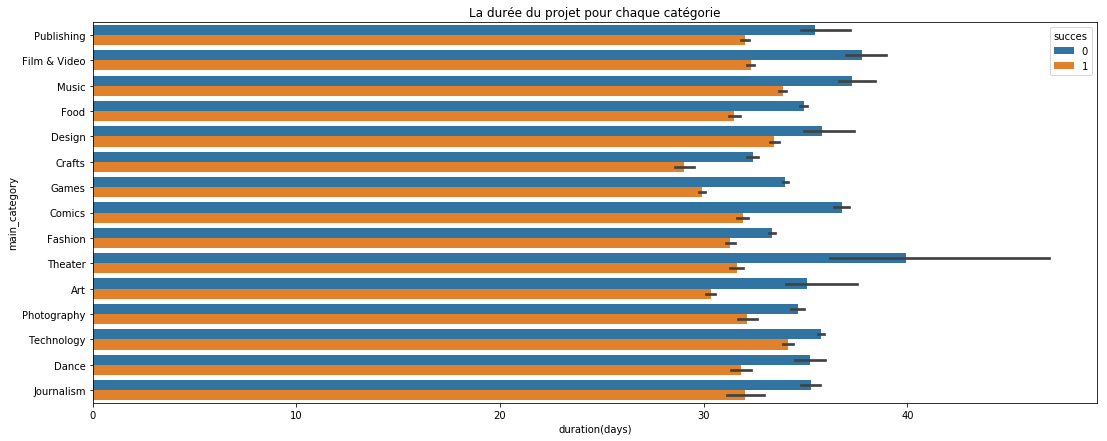

In [153]:
plt.subplots(figsize=(18,7))
sns.barplot(y='main_category', x='duration(days)', hue='succes', data=df)
plt.title('La durée du projet pour chaque catégorie')

## Moyenne des succès par catégorie

In [27]:
successful = df.loc[df.state=='successful']

In [29]:
groupby_main_category = successful.groupby(['main_category']).mean()
groupby_main_category

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,succes,launch_year
main_category,,,,,,,,
Art,4642.114081,7836.474882,90.358123,5420.993262,6971.894850,4410.086374,1.0,2013.898002
Comics,5693.607838,11902.964118,231.404314,9178.678422,11385.660235,5397.352176,1.0,2014.642759
Crafts,3539.475650,7022.015139,94.148463,4053.917054,5629.696889,3013.430794,1.0,2014.863357
Dance,4941.846497,5550.954380,63.396065,4445.787994,5194.016121,4601.094769,1.0,2013.555603
Design,17869.363175,69272.926059,614.783791,43550.117152,62858.524147,15408.835300,1.0,2014.861991
Fashion,10527.923923,23219.932871,217.001252,15136.854025,20286.555534,9080.955291,1.0,2014.715716
Film & Video,11486.109404,14380.737041,152.560428,12409.068566,13951.872429,11145.188408,1.0,2013.385599
Food,12177.780807,18039.985200,180.557929,14227.414871,17349.390516,11633.962945,1.0,2014.204601
Games,15280.369228,56018.565317,814.384087,41643.054423,54228.755136,14857.224807,1.0,2014.913964


## Analyse rapide 

Text(0.5,1,'Nombre de backers en fonction de la catégorie')

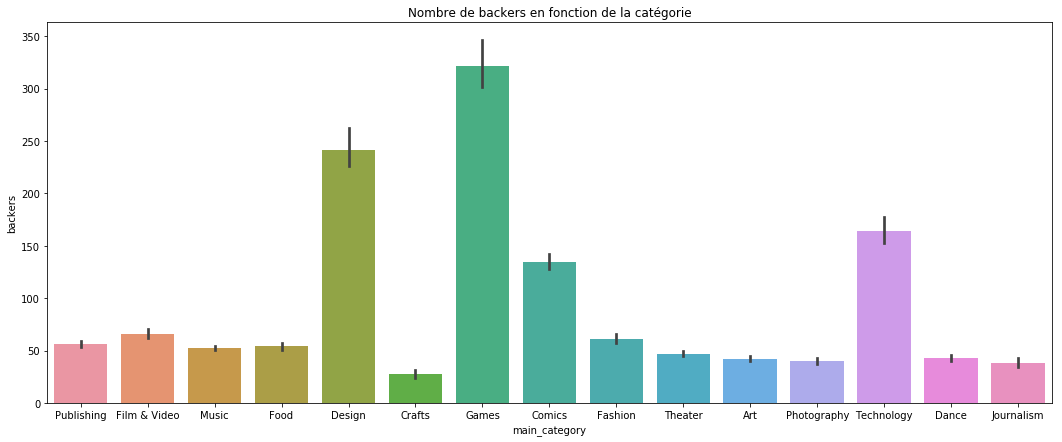

In [140]:
plt.subplots(figsize=(18,7))
sns.barplot(x = 'main_category', y = 'backers',data=df)
plt.title('Nombre de backers en fonction de la catégorie')

Cette analyse a déjà été faite plus haut mais je me suis rendu compte que les catégories les plus importantes (dance , théâtre et comic) n'avaient pas les meilleurs taux de réussite.
En calculant la moyenne de chaque catégorie on peut remarquer que le "goal" des 3 plus importantes catégories à savoir dance, théâtre et comic sont très faible par rapport aux autres et c'est pourquoi Games, Design et Technology passent devant eux.

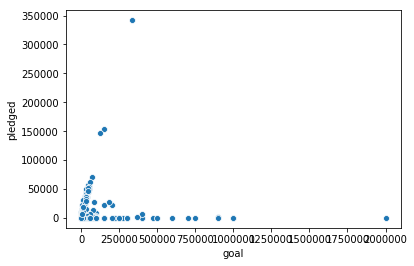

In [143]:
sns.scatterplot(x="goal", y="pledged", data=df[df.main_category == 'Dance'])


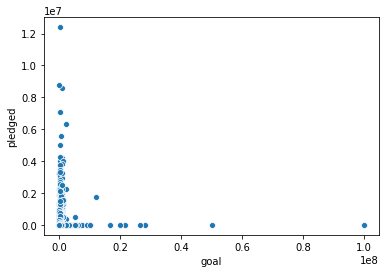

In [138]:
sns.scatterplot(x="goal", y="pledged", data=df[df.main_category == 'Games'])


Text(0.5,1,'Le goal amount USD en fcontion des USD pldeged')

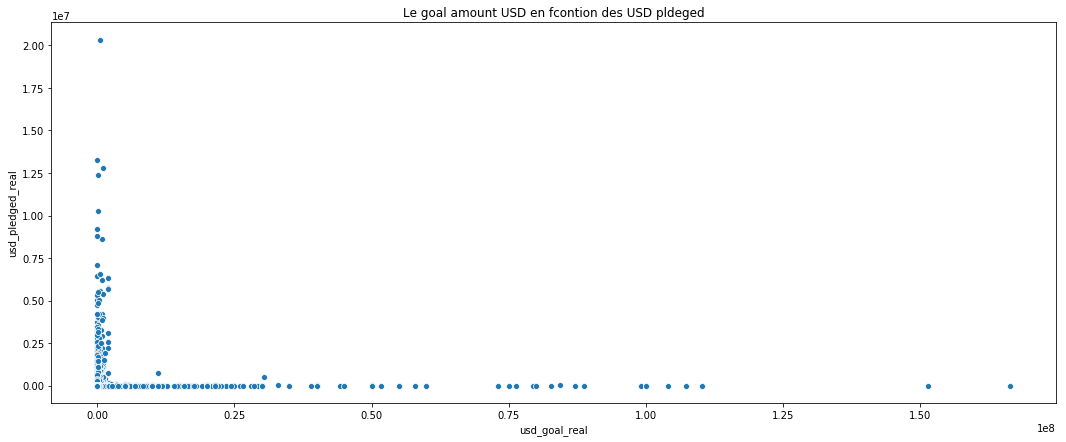

In [145]:
plt.subplots(figsize=(18,7))
sns.scatterplot(x='usd_goal_real',y='usd_pledged_real',data=df)
plt.title('Le goal amount USD en fcontion des USD pldeged')

In [ ]:
#sns.pairplot(df, vars=["goal", "backers"] , hue='succes')
#sns.pairplot(df)

Text(0.5,1,' Barplot croisant les backers et les currency')

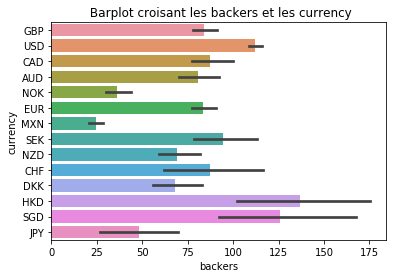

In [160]:
sns.barplot(x='backers',y='currency',data=df)
plt.title('Barplot croisant les backers et les currency')

## Conclusion
 - On peut supposer que de lancer un projet aux Etat-Unis est préférable mais il faut savoir que quasiment tous les projets commencent la bas. Il faut aussi prendre en compte que l'influence est dû aux grands nombres de personnes qu'il y a et que ça pourrait alors influencer sur le choix.
 - Comme on a pu le voir il est pas nécessaire de prendre les catégories les plus importants car il faudra ensuite faire attention à son goal qui va beaucoup influencer sur le nombre de personnes.